<h1 align="center"><font color='darkgreen'> Practical: kinetic modeling in Python </font></h1>

<p style="text-align:right">
3-8.10.2019
  
Supervisors: **Vakil Takhaveev**, **Douwe Grundel**
  
(PhD students, MSB, RUG)
</p>

**This practical has two goals:**

* familiarizing with Python that offers a plethora of tools to process, analyse and plot scientific data;

* familiarizing with the basics of kinetic modeling and numerical integration of systems of ordinary differential equations. 


First, we will recapitulate basic chemical kinetics theory (reactions of first and second order); we will analyze the equations by hand and solve them numerically with one of the Python modules.  


Second, we will work on a small model of cell cycle control and a model of a flux-dependent oscillatory system. These examples should provide you with an idea how deeper understanding about a biological system can be attained by dynamic modeling in comparison to the static depiction of biological networks classically presented in textbooks of cell biology, biochemistry and the like.


**Grade:**
For each exercise, it is indicated how many points can be earned for the correct answer. The total of 105 points can be obtained, so your grade for this practical will be calculated by dividing your points by 105 and then multipying by 10.
Please make all exercises **in this file!** At the end of the practical, send the complete file to **d.a.j.grundel@rug.nl**

***Double-click*** here to enter the edit mode.

*Name:*

*Student number:*

Use ***Shift+Enter*** to leave the edit mode.

<h2 align="left"><font color='navy'> A. Mass action kinetics [26 points]</font></h2>
<h3 align="left"><font color='navy'><i>Model 1. Irreversible first order reactions [8 points]</i></font></h3>

First-order reactions are reactions in which one substrate $S$ is irreversibly transformed into product $P$. In generalized schematics, the reaction looks the following:

<center>$S \xrightarrow[]{r_1} P$</center>
 
Prominent examples are decay reactions like the thermic decay of $N_2O_5$: 

<center>$ N_2O_5 \xrightarrow[]{r_1} N_2O_4+\frac{1}{2}O_2$</center>
 
or radioactive decay (depicted here is the alpha-decay of Radium to Radon): 

<center>$ Ra \xrightarrow[]{r_1} Rn+ 𝛼$</center>
 
The rate of the reaction is the temporal change (*i.e.* the derivative of the concentration with respect to time) in substrate or product:

<center>$\frac{dS}{dt} = −r_1$</center>
 
<center>$\frac{dP}{dt} = r_1$</center>
 
**Mass action** kinetics assumes that this rate is merely dependent on the concentration of substrate present: 

<center>$r_1=k_1\cdot S$,</center>
 
with $S$ representing the concentration of substrate and $k_1$ – the constant of proportionality which is usually called the rate constant.
<br>
<br>
<br>
<br>


<font color='firebrick'><b>Task A1: Find the analytic solution for the differential equation that describes the change in $S$ [3 points].</b></font>

*The goal is to derive the expression $S(t) = f(t)$, where $f$ is a function of time. Solve by separation of variables!*

*You need the following integration rule:* 

<center>$\int \frac{1}{x}dx = ln|x|+C$</center>

<font color='firebrick'><i>*Write your analytic derivation here using $\LaTeX$ code.*</i></font> *If you double click on the integration formula given above you will see the $\LaTeX$ code used to write it. From it, get the idea how to write your derivation. The powerful google may help you as well. You can return from the coding mode to the output by cellecting the cell of iterest and hitting Shift+Enter.*


$...$




The analytical solution gives the concentrations of $S$ and $P$ as a function of time. For a small system, the differential equations are relatively easy to solve. However, when a system involves more reactions it quickly gets very complicated. Therefore, it is often more practical to solve the system numerically. 

<font color='firebrick'><b>Task A2: Integrate the differential equation numerically [0 points].</b></font>

*Use the following values for the initial concentrations and the parameter: 
$S = 1\ mM$, $P = 0\ mM$, $k_1 = 0.5\ s^{-1}$*


**Solving a system numerically** works as follows: After you write the code and hit run, a software fills in the values for the parameters and the initial concentrations in the rate equations, and calculates the rates. Then it takes a small step in time ($\delta t$), while assuming that the reaction rates stay constant during this time step. The concentrations at time $t + \delta t$ are determined using these reaction rates. Subsequently, the concentrations at $t + \delta t$ are used to calculate the reaction rates again. Then another time step is taken and the concentrations at time $t + 2\delta t$ are determined. This process continues until the predetermined final time point is reached. 


The assumption that the reaction rates are constant during the interval $\delta t$ is, of course, not true. The rate equations are functions of the concentrations of the reactants, and these concentrations change during the time step. Nonetheless, by taking a very small value for $\delta t$, it is possible to get an accurate result. The Python module that we will use contains a number of algorithms (which we will not discuss here) that take into account that the reaction rates are not constant during a time step, thereby decreasing (but not completely eliminating) the error. 

In the following code it will be shown how to solve the differential equation using Python's module Tellurium.

#### 0. Importing required modules ####

We start a script with importing the mathematical functions and classes that we will use. Python itself is just a regular programming language, and doesn't know about the Tellurium library until you ask to import it. This first statement is an easy way to get everything imported at once (to run a code in the cell of interest select it and hit Shift+Enter; an asterisk in brackets [\*] will appear on the left side of the cell indicating that the code is running, wait a bit until the asterisk is replaced with a number):

In [1]:
!pip install -qqq tellurium #installing the module into your local Colab environment
import tellurium as te #importing the module for this particular notebook

Now let's import some modules required for data processing and plotting:

In [2]:
#Importing modules for imaging and data processing
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

*Python note: any line beginning with one or more **#** characters is a comment in Python. A comment may also be added to the end of a line, after which no more Python code can follow until the next line.*

**Generally, in order to perform a dynamic simulation one has to accomplish the following actions:**
1. identify the variables and give their initial values,(in context of biology, concentrations of compound are variables)
2. define rate equations,
3. define their mass balance equations,
4. set values for the kinetic parameters.

In the Tellurium package a model is written in a text string, that contains the information mentioned in #1-4.
Let's take a look at an example of a model string below.

In [19]:
  model_string='''
  // Species:  
  species S, P;

  // Species initializations:
  S = 1;
  P = 0;

  // Reactions with rate laws:
  R1: S -> P; k1*S;
 
  // Kinetic parameters:
  k1 = 1.0;
'''

#### 5. Passing the model_string to Tellurium ####

*ODE stands for ordinary differential equation. ODE is a differential equation containing one or more functions of one **independent variable** and its derivatives: in general form, $F(t, y(t), \frac{dy(t)}{dt}, \frac{d^2y(t)}{dt^2}, ..., \frac{d^ny(t)}{dt^n}) = 0$. In our practical we will deal with ODEs with first derivatives only: $F(t, y(t), \frac{dy(t)}{dt}) = 0$. The independent variable in our case is time **t**.*

In [24]:
model1 = te.loada(model_string)                                         #Load the model string to Tellurium

#### 6. Performing the simulation ####

We are now equipped to solve the ODE to obtain a trajectory from the initial condition. We can then plot the results. Unlike a window-based user interface, the solvers are not designed to plot to a window as they solve. In fact, that would make them much less efficient. Instead, the solver goes off and works by itself (usually silently), then returns its result. Only then we can inspect the results, and plot them if we want to.

In [25]:
result=model1.simulate(start=0, end=10, points=100)                     #Simulate the model

#### 7. Plotting the trajectories ####

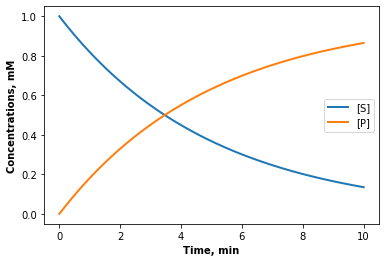

In [26]:
model1.plot(xtitle='Time, min',ytitle='Concentrations, mM')      #Plot the results


<font color='firebrick'><i>Question A2.1:Why does the rate at which $P$ is produced decrease over time? [1 point]</i></font> 


#### Changing parameters and initial conditions. ####

Let's explore how we can change reaction rates and initial concentrations.

After each simulation, Tellurium stores the final concentration as initial conditions for the next simulation. If you want to perform a new simulation with your default initial conditons , you need to reset the model by calling:

In [10]:
model1.reset()

To change reaction rates or starting concentrations we don't need to rewrite the whole model. Instead we can change them calling them from the model:

In [11]:
model1.k1=0.5
model1.S=2

And then we simulate the model with updated reaction rate k1 and initial concentration S1. What has changed from the previous simulation on the graph?

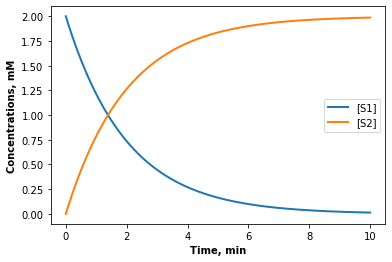

In [12]:
model1.simulate(start=0, end=10, points=100)                     #Simulate the model
model1.plot(xtitle='Time, min',ytitle='Concentrations, mM')      #Plot the results

<font color='firebrick'><i>Question A2.2: In the previous graph  around $1.38$ minutes the concentration curve of $S$ intersects that of $P$. If the value of $k_1$ is decreased to $0.05$, what would happen to the time of intersection? Test your hypothesis with the model!  Tip: Increase end time of simulation if needed.
[2 points]</i></font>  

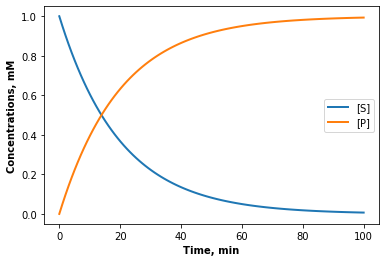

In [30]:
#SIMULATE THE MODEL IN THE QUESTION A2.2 HERE.
#FOLLOW THE SEQUENCE RESET - NEW PARAMETERS - SIMULATE - PLOT



#Solution:
model1.reset()
model1.k1=0.05
model1.simulate(start=0, end=100, points=100)                    
model1.plot(xtitle='Time, min',ytitle='Concentrations, mM')    


In [ ]:
#PLOT THE TRAJECTORIES HERE.


<font color='firebrick'><i>Question A2.3:The final concentration of $P$ is $1$. What would the final concentration of $P$ be if the initial concentrations of $S$ and $P$ were $2$ and $3$, respectively? [2 points]</i></font>  

In [ ]:
#SIMULATE THE MODEL IN THE QUESTION A2.3 HERE:

In [ ]:
#PLOT THE TRAJECTORIES HERE:

<h3 align="left"><font color='navy'><i>Model 2. Reversible first order reactions [9 points]</i></font></h3>

Most chemical (and biochemical) reactions are not irreversible. We will therefore expand the model with a second reaction, the reverse of $r_{-1}$, where product $P$ turns back into substrate $S$. The reverse reaction follows mass action kinetics too. In schematics, this looks as follows:

<center>$ S \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} P $</center>
 
<font color='firebrick'><b>Task A3: Write down the set of differential equations describing this reaction pair. Solve it numerically [3 points].</b></font>


*Follow the same steps as you did for **Model 1** to incorporate the second reaction into your model. Take a value of $0.5\ s^{-1}$ for $k_1$, of $0.2\ s^{-1}$ for $k_{-1}$, and of $1\ mM$ for $S$ at the start of the reaction.*

In [ ]:
#WRITE THE MODEL STRING HERE
model_string='''
  // Species:  
  

  // Reactions with rate laws:
 

  // Species initializations:


  // Kinetic parameters:
  
'''

model2=te.loada(model_string)  #load the model string to Tellurium

In [ ]:
#SIMULATE AND PLOT THE RESULTS HERE

<font color='firebrick'><i>Question A3.1: In your own words, explain why the concentration of $S$ does not approach $0$ [3 points].</i></font>
<br>
<br>
<font color='firebrick'><i>Question A3.2: Find the steady state concentration of $S$ and $P$ in the simulation results [3 points].</i></font>

<h3 align="left"><font color='navy'><i>Model 3. Reversible second order reactions [9 points].</i></font></h3>

In second order reactions two substrates react to one product. The model can be schematically represented as follows: 

<center>$ S_1 + S_2 \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} P $</center>
 
<font color='firebrick'><b>Task A4: Write down the set of differential equations describing this reaction pair. Solve it numerically [3 points].</b></font>


*Follow the same steps as you did for **Model 1** and **2** to incorporate the second substrate into your model. Take a value of $0.5\ mM^{-1} s^{-1}$ for $k_1$ and $0.2\ s^{-1}$ for $k^{-1}$. Set the initial amount of $S_1$ to be $1\ mM$, of  $S_2$ to be $0.8\ mM$ and of $P$ to be $0\ mM$.*

In [ ]:
#SIMULATE THE MODEL HERE

In [ ]:
#PLOT THE RESULTS HERE

<font color='firebrick'><i>Question A4.1: Find the steady state concentrations of $S_1$, $S_2$ and $P$ in your simulation [3 points].</i></font>
<br>
<br>
<font color='firebrick'><i>Question A4.2: Change the initial concentration of $S_2$ to $0.1$. Rerun the simulation and find the steady state concentrations of $S_1$, $S_2$ and $P$. Also try an initial $S_2$ concentration of $5$. In your own words, describe the differences and explain the cause [3 points].</i></font>

In [ ]:
#SIMULATE THE MODEL IN THE QUESTION A4.2 HERE:

In [ ]:
#PLOT THE TRAJECTORIES HERE:

In [ ]:
#SIMULATE THE MODEL IN THE QUESTION A4.2 HERE:

In [ ]:
#PLOT THE TRAJECTORIES HERE:

<h2 align="left"><font color='navy'> B. Cell cycle control [27 points]</font></h2>

The cell cycle is the series of events that lead to division and duplication of a cell. The molecular events that control the cell cycle are ordered and directional; that is, each process occurs in a sequential fashion and it is impossible to reverse the cycle. Therefore, the regulatory components need to oscillate in time. 


We assume the cell cycle to be driven by a protein circuit centered on the cyclin-dependent protein kinase (CDK1) and the anaphase-promoting complex (APC). CDK1 is activated by the rapid, high-affinity binding of cyclin, which itself is being synthesized at a constant rate. Activated CDK1 phosphorylates a variety of target substrates driving the cell into mitosis. It also activates the APC which drives the cell again out of mitosis and therefore needs to lag behind CDK1. APC will inactivate CDK1. The cycling appearance of CDK1 and APC is depicted in **Figure 1**.  

<img src="https://github.com/vakiltakhaveev/misc/blob/master/cell_cycle_osc.png?raw=true" align="center" width="300">

**Figure 1**: CDK 1 drives the cell into mitosis, APC lagging behind drives it out again.


Here, we try to understand what is necessary for this cycling, oscillatory appearance of the different components. Therefore, we are going to analyze three possible models of rising complexity of cell cycle control. They are depicted in **Figure 2**.

<img src="https://github.com/vakiltakhaveev/misc/blob/master/cell_cycle_models.png?raw=true" align="center" width="600">

**Figure 2**: Different negative feedback loops of rising complexity. **A.** CDK1 exerts negative feedback on itself. **B.** CDK1 activates APC which leads to its own inactivation. **C.** The polo-like kinase 1 has been added to the regulatory network. It gets activated by CDK1 and then activates APC. In turn, APC inactivates CDK1. For all three it is assumed that CDK1 itself is activated by the rapid, high-affinity binding of cyclin, which is being synthesized at a constant rate. 

<h3 align="left"><font color='navy'><i>Model 1. Cell cycle control mediated only by CDK1 [4 points]</i></font></h3>

We first analyze the simple one-component model depicted in **Figure 2A**. It can be described the following: CDK1 is activated by the binding of cyclin, which is present at a constant concentration. Because the cyclin concentration is constant, we assume that the activation rate of CDK1 is also constant:

<center>$ r_{activation} = k_1$</center>
 
The inactivation of CDK1 could be described as a mass action kinetic of second order depending on CDK1 and APC: 

<center>$ r_{inactivation} = k_2 \cdot CDK1 \cdot APC$</center>
 
However, here we want to construct a very simple model based only on CDK1 and, hence, we want to remove APC from the rate equation. Therefore, we assume that APC is regulated so fast, that we can view it as a direct function of CDK1. We will assume that this regulation is ultrasensitive and describe it by a Hill function.

<center>$ r_{inactivation} = k_2 \cdot CDK1 \cdot \frac{CDK1^n}{K^n+CDK1^n}$</center>
 

<font color='firebrick'><b>Task B1: Numerically integrate the equation over time [4 points].</b></font>


*Use the following initial concentration and parameters:*


*$CDK1 = 0$, $k_1 =  0.1$, $k_2 = 1$, $K = 0.5$, $n =8$*

In [ ]:
#SIMULATE THE MODEL HERE
#USE ** for the power, e.g.: CDK1**n means CDK1^n

In [ ]:
#PLOT THE RESULTS HERE

<h3 align="left"><font color='navy'><i>Model 2. Cell cycle control mediated by CDK1 and APC [11 points]</i></font></h3>

In the next step, we add the second ODE, which describes that APC regulation is not instantaneous (**Figure 2B**).
<br>
<br>


<font color='firebrick'><b>Task B2: Write a model consisting of the two components, CDK1 and APC, changing over time and simulate it [3 points]. </b></font>


*Give the initial conditions of CDK1 and APC: both start with an active concentration of zero. Assume again that CDK1 is activated at a constant rate. For the inactivation of CDK1 assume that APC acts in an ultrasensitive process.
APC gets activated by the ultrasensitive binding of CDK1. Assuming that the total concentration of APC is constant, we take the concentration of inactive APC to be $1-APC_{active}$. Put together, the activation for APC looks the following:*


*<center>$ r_{activation\_APC} = k \cdot (1-APC) \cdot \frac{CDK1^n}{K^n+CDK1^n} $</center>*


*Assume that APC gets inactivated by a process following mass action kinetics of 1st order.*


*Use the following parameters for the simulation:*


*$k_1 = 0.1$ (activation of CDK1),*

*$k_2 = 3$ (inactivation of CDK1),*

*$k_3 = 3$ (activation of APC),*

*$k_4 = 1$ (inactivation of APC),*

*$n_1 = 8$ (Hill coefficient for the action of APC onto CDK leading to CDK’s inactivation),*

*$n_2 = 8$ (Hill coefficient for the action of CDK onto APC leading to APC’s activation),*

*both $K = 0.5$.*


In [ ]:
#SIMULATE THE MODEL HERE

In [ ]:
#PLOT THE RESULTS HERE

<font color='firebrick'><i>Question B2.1: Depict the system in a phase space. Plot CDK1 on the x-axis and APC on the y-axis. What is the final state of the system? Can you find the same in the time course plot? [4 points]</i></font>

In [ ]:
#PLOT THE PHASE SPACE HERE

The phase space represents all possible states of a system. The system’s evolving state over time traces a path (a phase space trajectory).

Now let's check if differing starting conditions lead you to a different steady-state.   

In [ ]:
#let's make a list of pairs of initial conditions (CDK1, APC)
pairs_of_initial_conditions = [(0, 0), (0.1, 0.35), (0.3, 0.45), (0.55, 0.05), (0.5, 0.4)]

#we will put the results of simulations from the initial contitions into the following list: 
output = []

#no we will simulate the model several times; each time with a different pair of initial conditions
#for that we will iterate over all pairs in the list of initial conditions that we created above

for pair in pairs_of_initial_conditions:

    #1. Assebling initial values of variables into a dictionary
    initial_conditions_dictionary = {}
    initial_conditions_dictionary["CDK1"] = pair[0] # pair[0] is the first element of the pair
    initial_conditions_dictionary["APC"] = pair[1]  # pair[0] is the second element of the pair


    #2. Writing rate statements into variables.
    #Rate statements are in the form of strings.
    #USE ** for the power, e.g.: CDK1**n means CDK1^n
    
    #!!!!!!!FILL WITH YOUR CODE

    #3. Assebling mass balances of all variables into a dictionary.
    #Mass balances are in the form of strings, they are a composed via concatenating
    #rate statements with the symbols "+" and "-".
    
    #!!!!!!!FILL WITH YOUR CODE

    #4.Assebling parameter values into a dictionary
    
    #!!!!!!!FILL WITH YOUR CODE


    DSargs = args()                                # create an empty object instance of the args class, call it DSargs
    DSargs.name = 'Kinetic_modeling'               # name our model
    DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
    DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
    DSargs.tdata = [0, 10]                         # declare how long we expect to integrate for
    DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary

    DS = Generator.Vode_ODEsystem(DSargs)

    #simulating the model
    traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
    #extracting the trajectories and storing them in the variabe pts
    pts = traj.sample()
    
    #putting the result into the list output
    output.append(pts)
    

In [ ]:
#Plotting the phase space

plt.figure(1, (5, 5))

ax = plt.subplot(1, 1, 1)
plt.plot(output[0]['CDK1'], output[0]['APC'], color="red")


#!!!!PLOT THE REMAINING TRAJECTORIES


plt.xlabel('CDK1')
plt.ylabel('APC')

plt.tight_layout()

<font color='firebrick'><i>Question B2.2: How could you interpret this figure? [4 points]</i></font>

<h3 align="left"><font color='navy'><i>Model 3. Cell cycle control model with three components [12 points]</i></font></h3>

<font color='firebrick'><b>Task B3: Add a third reactant to the model (Plk1, look at **Figure 2C**). Suppose Plk1 to act as an intermediate between CPK1 and APC [4 points]. </b></font>


*Suppose that CDK1 gets activated and inactivated as before. Plk1 is activated by CDK1 (assume ultrasensitivity; concentration of inactive Plk1 is given by (1-Plk1); inactivation follows mass action kinetics). APC is activated by Plk1 (assume ultrasensitivity); the inactivation follows mass action kinetics. Increase integration time to 20. *



*Simulate these ODEs. Use the following parameters: $k_1 = 0.1$ (activation of CDK1), $k_2 = 3$ (inactivation of CDK1), $k_3 = 3$ (activation of Plk1), $k_4 = 1$ (inactivation of Plk1), $k_5 = 3$ (activation of APC), $k_6 = 1$ (inactivation of APC), assume all Hill coefficients to be $8$ and all $K$ to be $0.5$.*


In [ ]:
#SIMULATE THE MODEL HERE
#SIMULATE FROM t=0 to t=20

In [ ]:
#PLOT THE RESULTS HERE

Let's plot the phase space of the model. The model contains 3 variables, therefore the phase space will be 3-dimensional.

In [ ]:
#importing a module need for 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#plotting the phase space
fig = plt.figure()
ax = Axes3D(fig)

#Guess how to plot three variables!

ax.set_xlabel('CDK')
ax.set_ylabel('APC')
ax.set_zlabel('Plk1')

<font color='firebrick'><i>Question B3.1: Modify your model so that you no longer assume ultrasensitive responses but Michaelis-Menten (you can do so by simply changing the Hill coefficients!). What do you see? [3 points]</i></font>

In [ ]:
#SIMULATE THE MODEL HERE
#SIMULATE FROM t=0 to t=20

In [ ]:
#PLOT THE RESULTS HERE

<font color='firebrick'><b>Task B4: Compare your results! In which cases did the system oscillate? Try to describe what characteristics are necessary for an oscillatory system [5 points]. </b></font>

<h2 align="left"><font color='navy'> C. Flux-dependent oscillatory circuit [33 points]</font></h2>

The following assignment is based on a paper that was published several years ago. The authors described the construction of a circuit that is capable of oscillating, depending on the flux through glycolysis. The oscillatory circuit was constructed by placing two genes of *E. coli*’s acetate pathway under control of acetylphosphate, an intermediate in this pathway. In order to characterize this circuit, the authors developed a kinetic model, which we will reproduce here with some small alterations.

<font color='firebrick'><b>Task C1: Read the following text and write down the differential equations that describe the system.</b></font>

The system (see **Figure 3**) is designed around acetate metabolism in *E. coli*. $AcetylCoA$ is produced in glycolysis with rate $r_{gly}$, which we consider to be constant, at a value of $0.05\ mM\ min^{-1}$. It is consumed in a number of reactions. For simplicity, all $AcetylCoA$ consuming reactions (except for one, see below) are modeled as one reaction, which we assume to follow mass action kinetics, with a rate constant $k$ of $10\ min^{-1}$.


In the remaining reaction, $AcetylCoA$ is also converted into $AcetylPhosphate$ by the enzyme phosphate acetyltransferase ($Pta$). This enzyme follows Michaelis-Menten kinetics (at an enzyme concentration of $1\ \mu M$: $k_M = 0.06\ mM$, $v_{max} = 80\ mM\ min^{-1}$). In the next step in the pathway, $AcetylPhosphate$ is reversibly converted into $Acetate$. Both the forward and reverse reactions follow mass action kinetics ($k_{forward} = 1\ min^{-1}$; $k_{reverse} = 1\ min^{-1}$).


$Acetate$ is the substrate of the enzyme acetylCoA synthetase ($Acs$), which exhibits Michaelis-Menten kinetics (at an enzyme concentration of $1\ \mu M$: $k_M = 0.1\ mM$, $v_{max} = 0.8\ mM\ min^{-1}$). $Acs$ converts acetate into $AcetylCoA$. $Acetate$ is also secreted by the cell with mass action kinetics ($k = 0.005\ min^{-1}$).


To achieve oscillations in the system, the expression of the genes encoding $Pta$ and $Acs$ has been placed under control of $AcetylPhosphate$. The expression of $Acs$ is increased in the presence of $AcetylPhosphate$, which we will model with the Hill equation ($v_{max} = 2\ \mu M\ min^{-1}$, $K_H = 10\ mM$, $n = 2$). The expression of $Pta$ is inhibited indirectly: first, $AcetylPhosphate$ stimulates the expression of the Lac repressor $LacI$, which is also modeled with the Hill equation ($v_{max} = 0.1 \mu M\ min^{-1}$, $K_H = 10\ mM$, $n = 2$). In turn, $LacI$ represses the expression of $Pta$, because it was placed under control of a Lac operator. For this repression, use the following rate equation:


<center>$r=v_{max} \cdot(1- \frac{LacI^n}{LacI^n + K_H^n})$,</center>

where $r$ is the rate of $Pta$ synthesis, $v_{max} = 2 \mu M\ min^{-1}$, $K_H = 0.001\ \mu M$ and $n = 2$.
The proteins ($Pta$, $Acs$ and $LacI$) are degraded according to mass action kinetics ($k = 0.06 min^{-1}$).



<img src="https://github.com/vakiltakhaveev/misc/blob/master/flux_syst.png?raw=true" align="center" width="400">
**Figure 3**: A schematic representation of the system taken from the original publication. The production of acetyl-CoA from sugars and fatty acids will be modeled with a single rate only. The ATP and phosphate molecules are not included in the model. The reactions at the bottom of the figure will be simplified in our model, such that acetate ($OAc^-$) is directly exported, without being converted into acetic acid ($HOAc$) first.


<font color='firebrick'><b>Task C2: Simulate the model and describe what you see [10 points].</b></font>


*Use 0 as the initial concentrations. Integrate for at least 1000, because it will take the system some time to reach a steady-state.*


In [ ]:
#Assebling initial values of variables into a dictionary
initial_conditions_dictionary = {}
initial_conditions_dictionary["AcetylCoA"] = 0
initial_conditions_dictionary["pta"] = 0
initial_conditions_dictionary["Acetyl_phosph"] = 0
initial_conditions_dictionary["Acetate"] = 0
initial_conditions_dictionary["acs"] = 0
initial_conditions_dictionary["LacI"] = 0


#Writing rate statements into variables.
#Rate statements are in the form of strings.

r_gly = "k_gly"
r_AcetylCoA_cons = "k_AcetylCoA_cons*AcetylCoA"

#!!!!!!! FINISH WITH YOUR CODE


#Assebling mass balances of all variables into a dictionary.
#Mass balances are in the form of strings, they are a composed via concatenating
#rate statements with the symbols "+" and "-".

equations_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



#Assebling parameter values into a dictionary
parameters_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



DSargs = args()                                # create an empty object instance of the args class, call it DSargs
DSargs.name = 'Kinetic_modeling'               # name our model
DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
DSargs.tdata = [0, 1000]                       # declare how long we expect to integrate for
DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary


DS = Generator.Vode_ODEsystem(DSargs)
DS.init_step = 1 #setting the integration time step to 1 in order to reduce computation time


#simulating the model
traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
#extracting the trajectories and storing them in the variabe pts
pts = traj.sample()

In [ ]:
#REPLACE NAMES OF THE VARIABLES USED HERE TO ONES YOU USED IN THE SIMULATION

plt.figure(1, (10, 10))

ax = plt.subplot(2, 2, 1)
plt.plot(pts['t'], pts['Acetyl_phosph'], label='Acetyl_phosph', color="blue")
plt.plot(pts['t'], pts['Acetate'], label='Acetate', color="green")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 2)
plt.plot(pts['t'], pts['AcetylCoA'], label='AcetylCoA', color="red")
plt.legend()
plt.xlabel('Time, min')
Plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 3)
plt.plot(pts['t'], pts['pta'], label='pta', color="purple")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 4)
plt.plot(pts['t'], pts['acs'], label='acs', color="violet")
plt.plot(pts['t'], pts['LacI'], label='LacI', color="darkred")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

plt.tight_layout()

<font color='firebrick'><b> Task C3: Run two more simulations to test the effect of the glycolytic flux on the occurrence of oscillations in the circuit. Use $r_{gly} = 0.01$ and $0.5$ [4 points]. </b></font>
<br>
<br>

<font color='firebrick'><i>Question C3.1: You should see completely different behaviors of the system. Depending on the glycolytic flux the system either reaches a steady-state, or it keeps oscillating. Can you explain why this is the case? [7 points]</i></font>

In [ ]:
### the case of r_gly = 0.01


#Assebling initial values of variables into a dictionary
initial_conditions_dictionary = {}
initial_conditions_dictionary["AcetylCoA"] = 0
initial_conditions_dictionary["pta"] = 0
initial_conditions_dictionary["Acetyl_phosph"] = 0
initial_conditions_dictionary["Acetate"] = 0
initial_conditions_dictionary["acs"] = 0
initial_conditions_dictionary["LacI"] = 0


#Writing rate statements into variables.
#Rate statements are in the form of strings.

r_gly = "k_gly"
r_AcetylCoA_cons = "k_AcetylCoA_cons*AcetylCoA"

#!!!!!!! FINISH WITH YOUR CODE


#Assebling mass balances of all variables into a dictionary.
#Mass balances are in the form of strings, they are a composed via concatenating
#rate statements with the symbols "+" and "-".

equations_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



#Assebling parameter values into a dictionary
parameters_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



DSargs = args()                                # create an empty object instance of the args class, call it DSargs
DSargs.name = 'Kinetic_modeling'               # name our model
DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
DSargs.tdata = [0, 1000]                       # declare how long we expect to integrate for
DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary


DS = Generator.Vode_ODEsystem(DSargs)
DS.init_step = 1 #setting the integration time step to 1 in order to reduce computation time


#simulating the model
traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
#extracting the trajectories and storing them in the variabe pts
pts = traj.sample()

In [ ]:
#REPLACE NAMES OF THE VARIABLES USED HERE TO ONES YOU USED IN THE SIMULATION

plt.figure(1, (10, 10))

ax = plt.subplot(2, 2, 1)
plt.plot(pts['t'], pts['Acetyl_phosph'], label='Acetyl_phosph', color="blue")
plt.plot(pts['t'], pts['Acetate'], label='Acetate', color="green")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 2)
plt.plot(pts['t'], pts['AcetylCoA'], label='AcetylCoA', color="red")
plt.legend()
plt.xlabel('Time, min')
Plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 3)
plt.plot(pts['t'], pts['pta'], label='pta', color="purple")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 4)
plt.plot(pts['t'], pts['acs'], label='acs', color="violet")
plt.plot(pts['t'], pts['LacI'], label='LacI', color="darkred")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

plt.tight_layout()

In [ ]:
### the case of r_gly = 0.5


#Assebling initial values of variables into a dictionary
initial_conditions_dictionary = {}
initial_conditions_dictionary["AcetylCoA"] = 0
initial_conditions_dictionary["pta"] = 0
initial_conditions_dictionary["Acetyl_phosph"] = 0
initial_conditions_dictionary["Acetate"] = 0
initial_conditions_dictionary["acs"] = 0
initial_conditions_dictionary["LacI"] = 0


#Writing rate statements into variables.
#Rate statements are in the form of strings.

r_gly = "k_gly"
r_AcetylCoA_cons = "k_AcetylCoA_cons*AcetylCoA"

#!!!!!!! FINISH WITH YOUR CODE


#Assebling mass balances of all variables into a dictionary.
#Mass balances are in the form of strings, they are a composed via concatenating
#rate statements with the symbols "+" and "-".

equations_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



#Assebling parameter values into a dictionary
parameters_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



DSargs = args()                                # create an empty object instance of the args class, call it DSargs
DSargs.name = 'Kinetic_modeling'               # name our model
DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
DSargs.tdata = [0, 1000]                       # declare how long we expect to integrate for
DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary


DS = Generator.Vode_ODEsystem(DSargs)
DS.init_step = 1 #setting the integration time step to 1 in order to reduce computation time


#simulating the model
traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
#extracting the trajectories and storing them in the variabe pts
pts = traj.sample()

In [ ]:
#REPLACE NAMES OF THE VARIABLES USED HERE TO ONES YOU USED IN THE SIMULATION

plt.figure(1, (10, 10))

ax = plt.subplot(2, 2, 1)
plt.plot(pts['t'], pts['Acetyl_phosph'], label='Acetyl_phosph', color="blue")
plt.plot(pts['t'], pts['Acetate'], label='Acetate', color="green")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 2)
plt.plot(pts['t'], pts['AcetylCoA'], label='AcetylCoA', color="red")
plt.legend()
plt.xlabel('Time, min')
Plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 3)
plt.plot(pts['t'], pts['pta'], label='pta', color="purple")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 4)
plt.plot(pts['t'], pts['acs'], label='acs', color="violet")
plt.plot(pts['t'], pts['LacI'], label='LacI', color="darkred")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

plt.tight_layout()

<font color='firebrick'><b> Task C4: When the researchers who introduced this system in *E. coli* added acetate to the growth medium, they found that the oscillations disappeared (the cells carried a fluorescent reporter so the oscillations could be observed). In your model, include the uptake of extracellular acetate [6 points].</b></font>
<br>
<br>
*For the uptake reaction assume mass action kinetics, with $k = 0.005\ min^{-1}$. Consider the extracellular acetate concentration to be constant, at $30\ mM$. Use $0.5\ mM\ min^{-1}$ for the glycolytic flux. Integrate for a longer time period to see the effect over a longer time period.*


In [ ]:
#Assebling initial values of variables into a dictionary
initial_conditions_dictionary = {}
initial_conditions_dictionary["AcetylCoA"] = 0
initial_conditions_dictionary["pta"] = 0
initial_conditions_dictionary["Acetyl_phosph"] = 0
initial_conditions_dictionary["Acetate"] = 0
initial_conditions_dictionary["acs"] = 0
initial_conditions_dictionary["LacI"] = 0


#Writing rate statements into variables.
#Rate statements are in the form of strings.

r_gly = "k_gly"
r_AcetylCoA_cons = "k_AcetylCoA_cons*AcetylCoA"

#!!!!!!! FINISH WITH YOUR CODE


#Assebling mass balances of all variables into a dictionary.
#Mass balances are in the form of strings, they are a composed via concatenating
#rate statements with the symbols "+" and "-".

equations_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



#Assebling parameter values into a dictionary
parameters_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



DSargs = args()                                # create an empty object instance of the args class, call it DSargs
DSargs.name = 'Kinetic_modeling'               # name our model
DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
DSargs.tdata = [0, 1000]                       # declare how long we expect to integrate for
DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary


DS = Generator.Vode_ODEsystem(DSargs)
DS.init_step = 1 #setting the integration time step to 1 in order to reduce computation time


#simulating the model
traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
#extracting the trajectories and storing them in the variabe pts
pts = traj.sample()

In [ ]:
#REPLACE NAMES OF THE VARIABLES USED HERE TO ONES YOU USED IN THE SIMULATION

plt.figure(1, (10, 10))

ax = plt.subplot(2, 2, 1)
plt.plot(pts['t'], pts['Acetyl_phosph'], label='Acetyl_phosph', color="blue")
plt.plot(pts['t'], pts['Acetate'], label='Acetate', color="green")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 2)
plt.plot(pts['t'], pts['AcetylCoA'], label='AcetylCoA', color="red")
plt.legend()
plt.xlabel('Time, min')
Plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 3)
plt.plot(pts['t'], pts['pta'], label='pta', color="purple")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 4)
plt.plot(pts['t'], pts['acs'], label='acs', color="violet")
plt.plot(pts['t'], pts['LacI'], label='LacI', color="darkred")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

plt.tight_layout()

<font color='firebrick'><i> Question C4.1: 	Explain why uptake of acetate suppresses oscillations in the system. Does an extracellular concentration of 20 mM also result in a stable steady-state? (Why?) [6 points]</i></font>

In [ ]:
#Assebling initial values of variables into a dictionary
initial_conditions_dictionary = {}
initial_conditions_dictionary["AcetylCoA"] = 0
initial_conditions_dictionary["pta"] = 0
initial_conditions_dictionary["Acetyl_phosph"] = 0
initial_conditions_dictionary["Acetate"] = 0
initial_conditions_dictionary["acs"] = 0
initial_conditions_dictionary["LacI"] = 0


#Writing rate statements into variables.
#Rate statements are in the form of strings.

r_gly = "k_gly"
r_AcetylCoA_cons = "k_AcetylCoA_cons*AcetylCoA"

#!!!!!!! FINISH WITH YOUR CODE


#Assebling mass balances of all variables into a dictionary.
#Mass balances are in the form of strings, they are a composed via concatenating
#rate statements with the symbols "+" and "-".

equations_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



#Assebling parameter values into a dictionary
parameters_dictionary = {}

#!!!!!!! FILL WITH YOUR CODE



DSargs = args()                                # create an empty object instance of the args class, call it DSargs
DSargs.name = 'Kinetic_modeling'               # name our model
DSargs.ics = initial_conditions_dictionary     # assign the initial conditions dictionary
DSargs.pars = parameters_dictionary            # assign the parameter values dictionary
DSargs.tdata = [0, 1000]                       # declare how long we expect to integrate for
DSargs.varspecs = equations_dictionary         # assign the mass balances dictionary


DS = Generator.Vode_ODEsystem(DSargs)
DS.init_step = 1 #setting the integration time step to 1 in order to reduce computation time


#simulating the model
traj = DS.compute("demo") #"demo" is the name of simulation that the user comes up with
#extracting the trajectories and storing them in the variabe pts
pts = traj.sample()

In [ ]:
#REPLACE NAMES OF THE VARIABLES USED HERE TO ONES YOU USED IN THE SIMULATION

plt.figure(1, (10, 10))

ax = plt.subplot(2, 2, 1)
plt.plot(pts['t'], pts['Acetyl_phosph'], label='Acetyl_phosph', color="blue")
plt.plot(pts['t'], pts['Acetate'], label='Acetate', color="green")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 2)
plt.plot(pts['t'], pts['AcetylCoA'], label='AcetylCoA', color="red")
plt.legend()
plt.xlabel('Time, min')
Plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 3)
plt.plot(pts['t'], pts['pta'], label='pta', color="purple")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

ax = plt.subplot(2, 2, 4)
plt.plot(pts['t'], pts['acs'], label='acs', color="violet")
plt.plot(pts['t'], pts['LacI'], label='LacI', color="darkred")

plt.legend()
plt.xlabel('Time, min')
plt.ylabel('Concentration, mM')

plt.tight_layout()

<h2 align="left"><font color='navy'> D. Analysing a bistable system [19 points]</font></h2> 

In this task we will consider a biochemical system where molecule P is produced and broken down. In order to keep things simple, we will not consider which molecules are required for the synthesis of P, nor will we consider the products produced when P is degraded. Instead, we will assume that P is generated (out of nothing) with rate $r_{form} = 3 + \frac{20}{1+2^{-3(P-5)}}$. P is broken down with rate $r_{deg} = 2.5 P$.

<font color='firebrick'><b>Task D1a: Simulate and plot the system. Also determine the steady state concentration of P.</b> [4 points] </font><br> Use the initial concentration of P = 3.0 mM.

In [ ]:
# SET INITIAL CONDITION

In [ ]:
# RATE STATEMENTS

In [ ]:
# MASS BALANCE

In [ ]:
# RUN SIMULATION

In [ ]:
# PLOT TRAJECTORIES (of P against time)

<font color='firebrick'>Please provide the steady state value of P:</b></font>

<font color='firebrick'><b>Task D1b: Repeat task D1a with different initial condition [1 point].</b></font><br>
Use the initial concentration of P = 7.0 mM

In [ ]:
# SET INITIAL CONDITION

In [ ]:
# RUN SIMULATION

In [ ]:
# PLOT TRAJECTORIES (of P against time)

<font color='firebrick'>Please provide the steady state value of P:</b></font>

<font color='firebrick'><b>Task D2: Investigate the steady states.</b></font><br>


If all went well you obtained two distinct steady state values of P. This means the steady state the system eventually reaches depends on the initial concentration of P. To determine what initial conditions are required to end up in a particular steady state, we are going to plot and analyse the rate characteristics (rates on the y-axis against P on the x-axis). <br> In order to obtain the rate characteristics we will define functions, using python. These functions should return the rate (r_form or r_deg) for any given concentration of P. Below such a function is defined for $r_{form}$:

In [ ]:
def calc_r_form(P): # We provide the function with a value for P as an input, see examples below
    r_form = 3 + 20/(1+ np.float_power(2,(-3*(P-5))))
    
    return r_form

We can now call the function calc_r_form and use it to calculate r_form for a given P, for example:

In [ ]:
calc_r_form(0) # calculate r_form when P = 0 mM

In [ ]:
calc_r_form(6) # calculate r_form when P = 6 mM

Below a similar function needs to be defined for r_deg. <font color='firebrick'>Please complete the function below: [2 points]</b></font>

In [ ]:
def calc_r_deg



return

The two functions above can now be used to obtain the rates between P = 0 mM and P = 11 mM (or any other range). A useful way to store the rate values for different concentrations of P is in a so-called numpy array. Below such an array containing P concentrations between 0 and 11 is defined. 

In [ ]:
P_concentrations = np.linspace(0,11,400)

In [ ]:
P_concentrations

As can been seen above, P_concentrations now contains 400 different concentrations of P, all between 0 and 11 (with steps of 11/400 between the values). Individual concentrations can be accesed as follows:

In [ ]:
P_concentrations[0] # The first concentration stored in P_concentrations (Python starts counting at 0, not at 1!)

In [ ]:
P_concentrations[1]

In [ ]:
P_concentrations[399]

<font color='firebrick'>Use the two functions (calc_r_form and calc_r_deg) to obtain two new numpy arrays. These new arrays should respectively contain the values of r_form and r_deg for the concentrations of P in P_concentrations. For example, r_form_array[0] should contain the value of r_form corresponding to the P concentration in P_concentrations[0]    [2 points] </b></font>. <br> Note that the functions can be applied to an array instead of a single concentration of P. You therefore do not need to use the function np.linspace to create these new arrays.   


In [ ]:
# create the numpy array for r_form

In [ ]:
# create the numpy array for r_deg

<font color='firebrick'>Next, we can use the three arrays (containing the P concentrations, rates for r_form, rates for r_deg) to plot the rate characteristics. This in done in the cell below, you only need to enter the two arrays you created above: [0 points]</b></font>

In [ ]:
r_form =   # enter name of r_form array defined above
plt.plot(P_concentrations, r_form,label="r_form") 
    
r_deg =  # enter name of r_deg array defined above
plt.plot(P_concentrations,r_deg,label="r_deg")
   
# Plot settings:
plt.xlim((0,11))
plt.xlabel('P (mM)')
plt.ylabel("rates (mM/s)")
plt.legend()
plt.show()

<font color='firebrick'>Questions task D2  </b></font>: <br>
    1. How can steady states be identified in the rate characteristic plotted above? [3 points]
    2. Give the possible steady states of the system [1 point]
    3. Under what initial P concentrations (if any) is each steady state reached? Use the rate characteristic plot to determine what the requirements are to reach each steady state. Check whether you are correct by running additional simulations below for different initial concentrations (you may add additional cells to the notebook below). [6 points]
    
   

### References ###

1. Practicum *Kinetic models* (2016) T. Kimkes, V. Takhaveev, M. Heinemann
2. PyDSTool web-site: http://www.ni.gsu.edu/~rclewley/PyDSTool/FrontPage.html
3. Clewley, R. (2012). Hybrid models and biological model reduction with PyDSTool. *PLoS Comput Biol*, 8(8), e1002628.
4. Ferrell, J. E., Tsai, T. Y. C., & Yang, Q. (2011). Modeling the cell cycle: why do certain circuits oscillate?. Cell, 144(6), 874-885.
5. Fung, E., Wong, W. W., Suen, J. K., Bulter, T., Lee, S. G., & Liao, J. C. (2005). A synthetic gene–metabolic oscillator. Nature, 435(7038), 118-122.